# Parameter Estimation Analysis with Refactored API

This notebook demonstrates the new refactored API for visualizing and analyzing parameter estimation results in PolyPESTO.

The main improvements include:
1. Clean separation between result handling, visualization, and comparison logic
2. Simplified function signatures with consistent interfaces
3. Improved error handling and documentation

In [1]:
# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import seaborn as sns

# PyPESTO and related libraries
import pypesto
import amici

# Enable autoreload for easier development
%load_ext autoreload
%autoreload 2

## 1. Import the New Modules

We now have specialized modules for handling different aspects of parameter estimation results:

In [2]:
# Import core modules
from polypesto.core.experiments import load_experiment
from polypesto.core.results import (
    ParameterResult,
    OptimizationResult,
    ProfileResult,
    SamplingResult,
)

# Import visualization module
from polypesto.visualization import (
    plot_waterfall,
    plot_profiles,
    plot_parameter_traces,
    plot_credible_intervals,
    plot_optimization_scatter,
    plot_sampling_scatter,
    visualize_parameter_estimation,
)

# Import analysis module
from polypesto.analysis import (
    create_parameter_comparison_df,
    compare_parameters_across_conditions,
)

## 2. Load Experiment Data

Let's load an existing experiment to analyze:

In [ ]:
# Define experiment parameters
DATA_DIR = Path("/PolyPESTO/experiments/irreversible_cpe/single_rxn/data")
MODEL_NAME = "irreversible_cpe"
PARAM_ID = "p_000"
CONDITION = "fA0_0.50"

# Load the experiment
experiment = load_experiment(DATA_DIR / CONDITION, MODEL_NAME)

# Get result and true parameters
result = experiment.get_result(PARAM_ID)
true_params = experiment.get_true_params(PARAM_ID)

Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualizat

## 3. Individual Visualizations

Create individual visualizations using the specialized plotting functions:

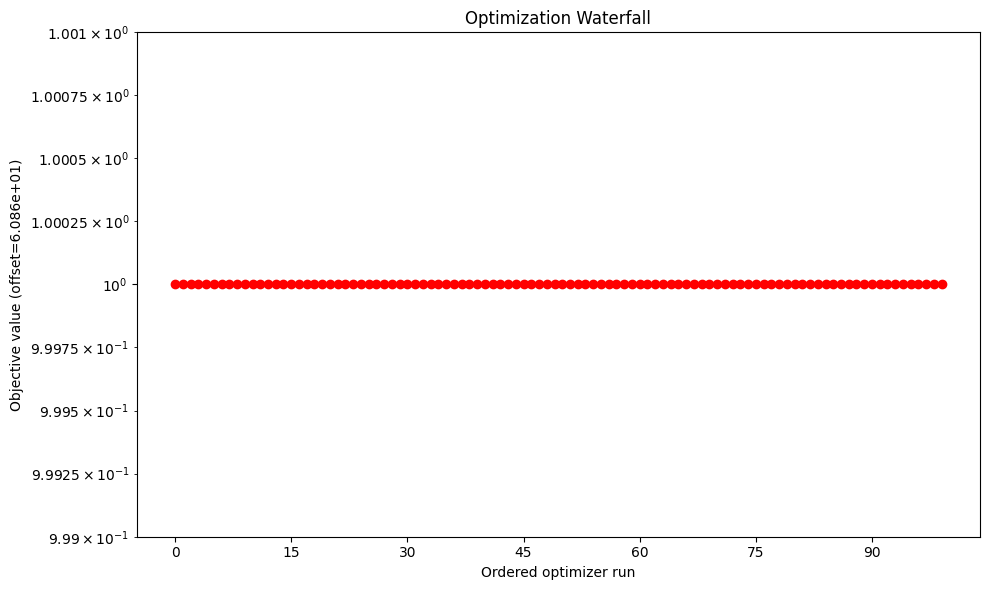

In [6]:
# Plot optimization waterfall
fig, ax = plot_waterfall(result, figsize=(10, 6), scale_y="log10")
plt.title("Optimization Waterfall")
plt.tight_layout()
plt.show()

In [7]:
# Plot parameter profiles
fig, axes = plot_profiles(
    result, true_params=true_params, figsize=(12, 5), show_bounds=True
)
plt.suptitle("Parameter Profiles with True Values")
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

TypeError: '<' not supported between instances of 'str' and 'int'

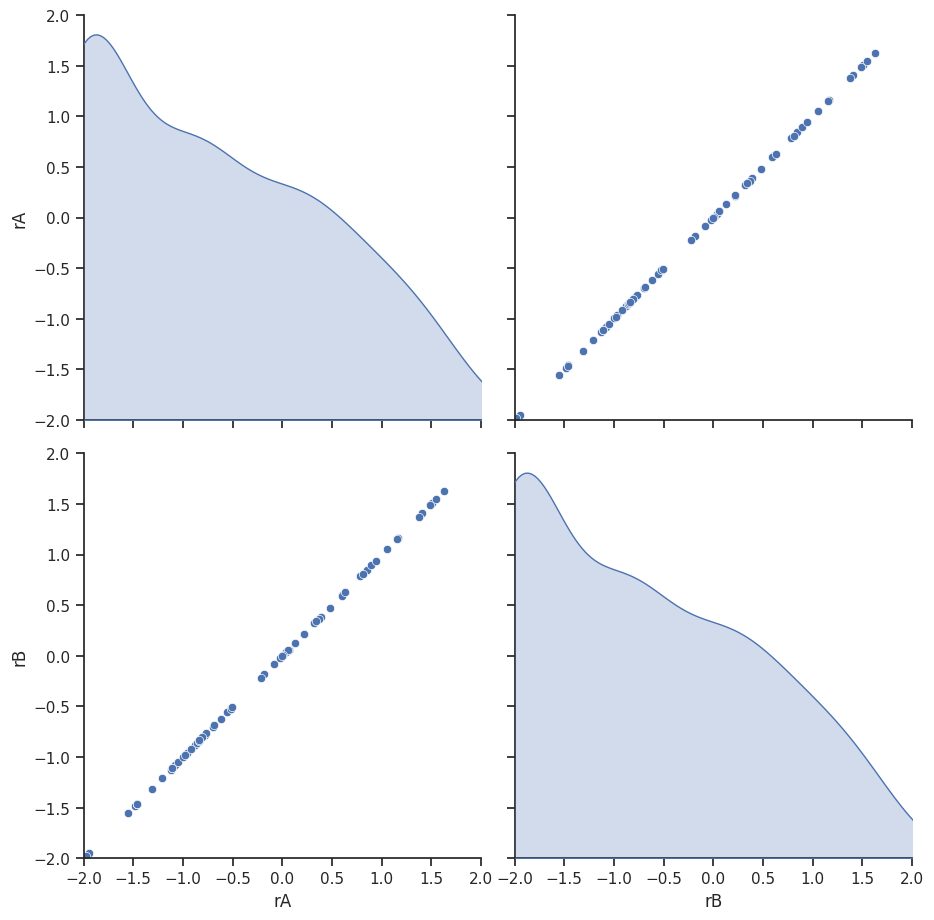

In [10]:
# Plot optimization scatter
fig, grid = plot_optimization_scatter(
    result,
    true_params=true_params,
    figsize=(10, 10),
    # parameter_indices="free_only",
    diag_kind="kde",
)
plt.suptitle("Parameter Optimization Scatter Plot")
plt.tight_layout()
plt.show()

## 4. Comprehensive Visualization

Create a comprehensive visualization with a single function call:

TypeError: '<' not supported between instances of 'str' and 'int'

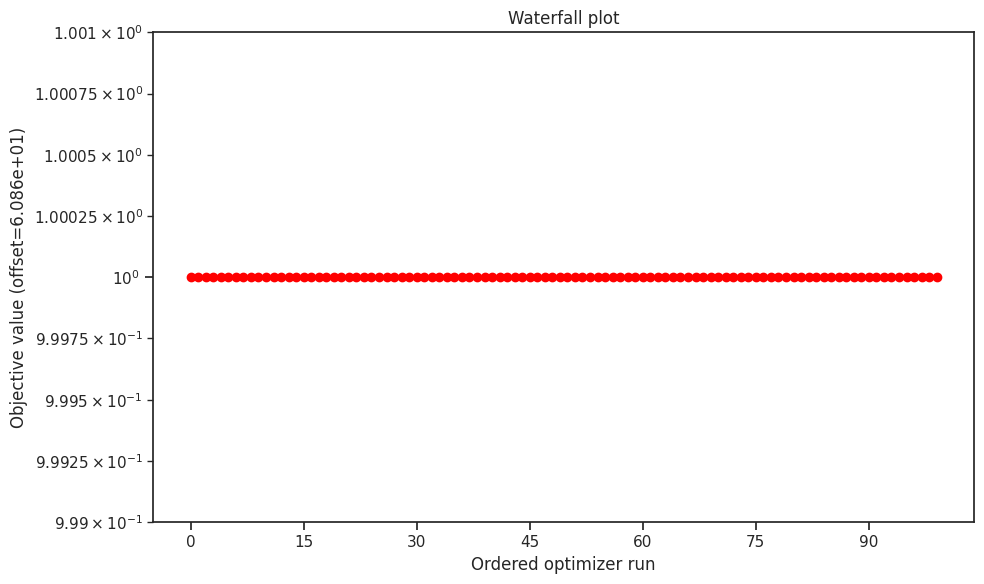

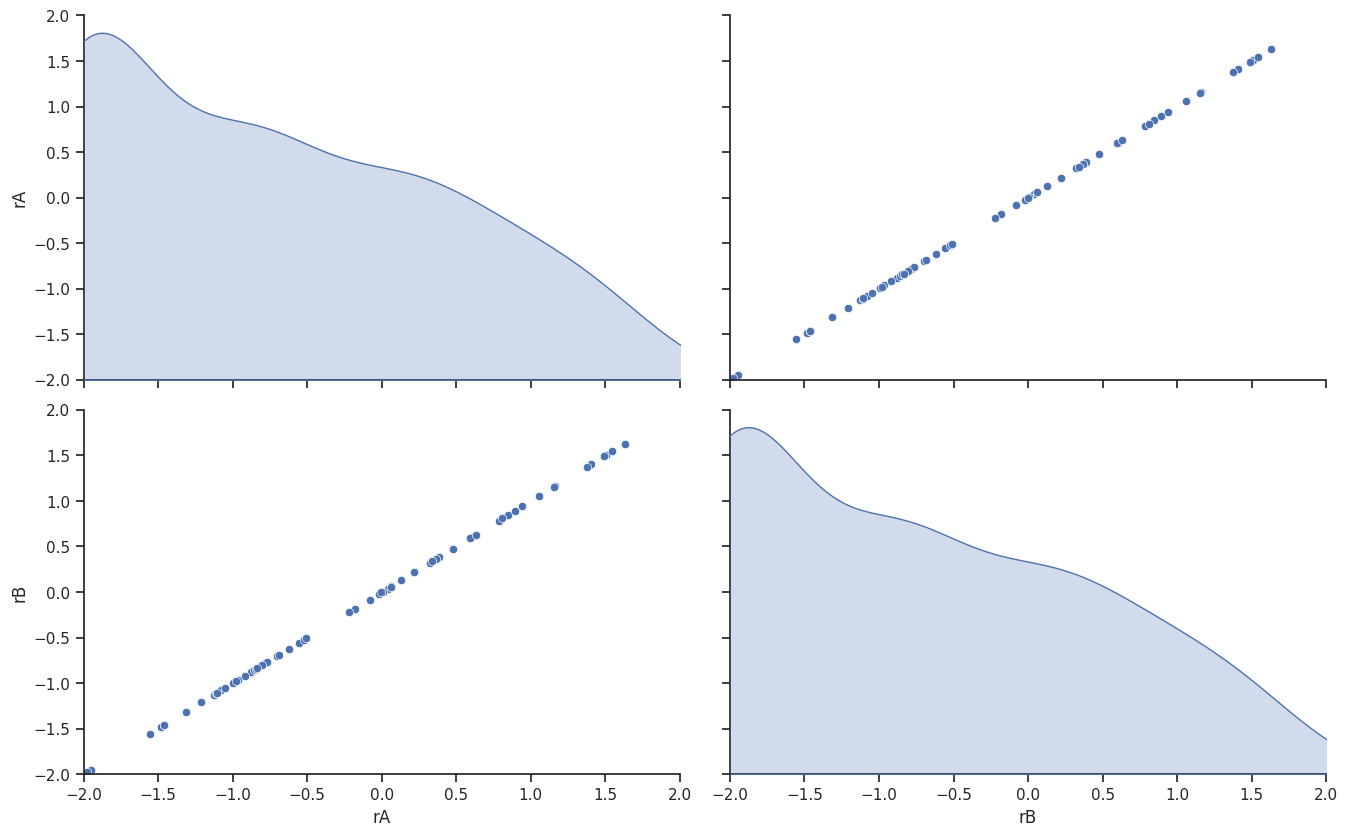

In [11]:
# Generate all visualizations
vis_results = visualize_parameter_estimation(
    result=result,
    true_params=true_params,
    plots=["waterfall", "scatter", "profiles", "traces", "intervals"],
)

# Display each visualization
for plot_type, (fig, ax) in vis_results.items():
    print(f"\n{plot_type.capitalize()} Plot:")
    plt.figure(fig.number)
    plt.suptitle(f"{plot_type.capitalize()}")
    plt.tight_layout()
    plt.show()

## 5. Parameter Comparison Across Conditions

Compare parameter estimation results across different experimental conditions:

In [ ]:
# Create comparison dataframe
comparison_df = create_parameter_comparison_df(
    data_dir=DATA_DIR,
    model_name=MODEL_NAME,
    param_id=PARAM_ID
)

# Show the comparison dataframe
comparison_df

In [ ]:
# Generate comparison visualizations
df, figures = compare_parameters_across_conditions(
    data_dir=DATA_DIR,
    model_name=MODEL_NAME,
    param_id=PARAM_ID,
    figsize=(10, 8)
)

# Display each comparison figure
for fig_name, (fig, _) in figures.items():
    print(f"\n{fig_name.capitalize()}:")
    plt.figure(fig.number)
    plt.tight_layout()
    plt.show()

## 6. Working with Result Classes Directly

For more advanced usage, you can work with the result handler classes directly:

In [ ]:
# Create an OptimizationResult handler
opt_result = OptimizationResult(
    result=result, 
    true_params=true_params
)

# Get best parameters
best_params = opt_result.get_best_parameters()
print("Best parameter estimates:")
for name, value in best_params.items():
    print(f"{name}: {value:.4f}")

# Get true parameter values
true_values = opt_result.get_true_parameter_values()
print("\nTrue parameter values (scaled):")
for name, value in true_values.items():
    print(f"{name}: {value:.4f}")

# Calculate parameter errors
print("\nParameter errors:")
for name in best_params:
    if name in true_values:
        error = best_params[name] - true_values[name]
        rel_error = error / abs(true_values[name]) if true_values[name] != 0 else float('inf')
        print(f"{name}: {error:.4f} (relative: {rel_error:.2%})")